<a href="https://colab.research.google.com/github/Abhinavs476/Topic-Modeling/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import pandas as pd
import os

# Open the zip file
with zipfile.ZipFile("papers.zip", "r") as zip_ref:
    # Extract the file to a temporary directory
    zip_ref.extractall("temp")

# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("temp/papers.csv")

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2394,2007,Continuous Time Particle Filtering for fMRI,We construct a biologically motivated stochast...,Continuous Time Particle Filtering for fMRI\n\...
4828,2014,Nonparametric Bayesian inference on multivaria...,We develop a model by choosing the maximum ent...,Nonparametric Bayesian inference on multivaria...
5638,2016,Relevant sparse codes with variational informa...,"In many applications, it is desirable to extra...",Relevant sparse codes with variational informa...
1654,2003,Extending Q-Learning to General Adaptive Multi...,Abstract Missing,Extending Q-Learning to General Adaptive\nMult...
2206,2006,Learning to be Bayesian without Supervision,Abstract Missing,Learning to be Bayesian without Supervision\n\...


In [4]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

,paper_text_processed
2394,continuous time particle filtering for fmri\n\...
4828,nonparametric bayesian inference on multivaria...
5638,relevant sparse codes with variational informa...
1654,extending q-learning to general adaptive\nmult...
2206,learning to be bayesian without supervision\n\...


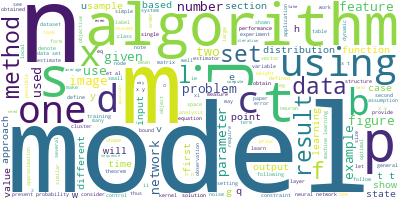

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
!pip install -U gensim

In [11]:
import gensim

In [8]:
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['continuous', 'time', 'particle', 'filtering', 'fmri', 'lawrence', 'murray', 'school', 'informatics', 'university', 'edinburgh', 'lawrencemurray', 'edacuk', 'amos', 'storkey', 'school', 'informatics', 'university', 'edinburgh', 'astorkey', 'edacuk', 'abstract', 'construct', 'biologically', 'motivated', 'stochastic', 'differential', 'model', 'neural', 'hemodynamic']


In [9]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 23), (13, 4), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [19]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"model" + 0.005*"data" + 0.005*"learning" + 0.004*"function" + '
  '0.004*"algorithm" + 0.003*"figure" + 0.003*"neural" + 0.003*"using" + '
  '0.003*"set" + 0.003*"two"'),
 (1,
  '0.007*"learning" + 0.005*"model" + 0.004*"distribution" + 0.004*"data" + '
  '0.004*"two" + 0.003*"function" + 0.003*"algorithm" + 0.003*"figure" + '
  '0.003*"time" + 0.003*"set"'),
 (2,
  '0.007*"model" + 0.005*"data" + 0.004*"learning" + 0.004*"algorithm" + '
  '0.004*"time" + 0.004*"one" + 0.004*"using" + 0.004*"set" + 0.003*"function" '
  '+ 0.003*"problem"'),
 (3,
  '0.007*"model" + 0.007*"data" + 0.006*"learning" + 0.005*"one" + '
  '0.004*"algorithm" + 0.004*"set" + 0.004*"models" + 0.004*"time" + '
  '0.004*"neural" + 0.003*"using"'),
 (4,
  '0.007*"model" + 0.006*"learning" + 0.005*"algorithm" + 0.005*"using" + '
  '0.005*"time" + 0.004*"data" + 0.003*"results" + 0.003*"problem" + '
  '0.003*"one" + 0.003*"models"'),
 (5,
  '0.006*"model" + 0.005*"learning" + 0.005*"models" + 0.004*"da

In [14]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.2 MB/s eta 0:00:00


In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('results/outputLDAvis_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'results/outputLDAvis_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.004020 -0.000695       1        1  21.436968
6      0.004452  0.004344       2        1  13.508419
3     -0.000258 -0.007382       3        1  12.684576
2     -0.001647 -0.006506       4        1  11.691858
9      0.004305  0.000976       5        1  10.372429
7     -0.001070  0.004956       6        1   9.332729
1      0.000649  0.004164       7        1   6.990640
4      0.003841 -0.001409       8        1   6.364289
5     -0.013209  0.001953       9        1   5.535981
0     -0.001083 -0.000400      10        1   2.082111, topic_info=            Term         Freq        Total Category  logprob  loglift
493        model  1463.000000  1463.000000  Default  30.0000  30.0000
437     learning  1406.000000  1406.000000  Default  29.0000  29.0000
337     function   798.000000   798.000000  Default  28.0000  28.0000
170         data  1382.000000  1382.000000  Default  27.0000  27.0000
305       figure   667.000000   667.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
554          one    11.686611   797.820761  Topic10  -6.0297  -0.3517
398  information    10.067554   562.201641  Topic10  -6.1788  -0.1508
313        first     9.866942   533.307140  Topic10  -6.1989  -0.1181
539       number    10.117710   622.740085  Topic10  -6.1738  -0.2481
811         time    10.364890   797.269560  Topic10  -6.1497  -0.4710

[848 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
10740      1  0.393528  abalone
10740      2  0.196764  abalone
10740      5  0.196764  abalone
9424       1  0.074397   absent
9424       2  0.148794   absent
...      ...       ...      ...
6309       6  0.153686       zk
6309       7  0.038421       zk
6309       8  0.076843       zk
6309       9  0.038421       zk
6309      10  0.019211       zk

[3634 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 4, 3, 10, 8, 2, 5, 6, 1])